## 배달식선호 및 건강관심 성향에 따른 배달 소비 관계 분석 

삼성카드가 추정한 배달음식 선호성향 및 건강관심도 페르소나 등급(20등급)에 따른 외식소비패턴 분석 데이터입니다. 카드사에서 제공한 샘플데이터이기 때문에 일반화 할 수 없음을 미리 밝힙니다. <br>
※ 배달식선호/건강관심 성향 : 당사가 회원의 소비데이터로 모델링하여 추정한 고객의 특성. 지수를 20 등급화(1등급이 제일 관심도가 높음)

### 패키지 가져오기

In [198]:
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from pandas import read_excel, DataFrame
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel, pivot_table
import seaborn as sb
import numpy as np
import sys
import os

기본 설정

In [199]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 불러오기

In [200]:
df = read_excel("삼성카드_외식소비패턴.xlsx")
df

,소비년월,거주지_광역시도,거주지_시군구,배달식선호등급,건강관심도등급,연령대,성별,외식업종분류,평일휴일,소비건수합계
0,202009,경기,시흥시,1,17,20대,남성,간편음식,평일,83
1,202009,경기,부천시,1,15,20대,여성,한식,평일,101
2,202009,경기,이천시,4,19,30대,남성,피자/치킨,평일,12
3,202009,경기,오산시,2,16,30대,남성,디저트,평일,95
4,202009,경기,김포시,10,16,40대,남성,디저트,휴일,49
...,...,...,...,...,...,...,...,...,...,...
95,202009,인천,부평구,5,19,30대,남성,한식,평일,71
96,202009,인천,부평구,9,15,40대,여성,디저트,평일,36
97,202010,인천,서구,3,15,20대,여성,한식,평일,37
98,202010,인천,연수구,1,18,30대,남성,간편음식,평일,84


### 데이터 타입(종류) 확인

In [201]:
df.shape

(100, 10)

In [202]:
df.dtypes

소비년월         int64
거주지_광역시도    object
거주지_시군구     object
배달식선호등급      int64
건강관심도등급      int64
연령대         object
성별          object
외식업종분류      object
평일휴일        object
소비건수합계       int64
dtype: object

In [203]:
df = df.astype({'거주지_광역시도': 'category', '거주지_시군구': 'category', '연령대': 'category','성별': 'category', '외식업종분류': 'category', '평일휴일': 'category'})
df.dtypes

소비년월           int64
거주지_광역시도    category
거주지_시군구     category
배달식선호등급        int64
건강관심도등급        int64
연령대         category
성별          category
외식업종분류      category
평일휴일        category
소비건수합계         int64
dtype: object

### 데이터 전처리
1) 결측치 확인 → 결측치 없음
2) '소비건수합계' column의 이상치 확인

In [204]:
empty = df.isnull()
empty.sum()

소비년월        0
거주지_광역시도    0
거주지_시군구     0
배달식선호등급     0
건강관심도등급     0
연령대         0
성별          0
외식업종분류      0
평일휴일        0
소비건수합계      0
dtype: int64

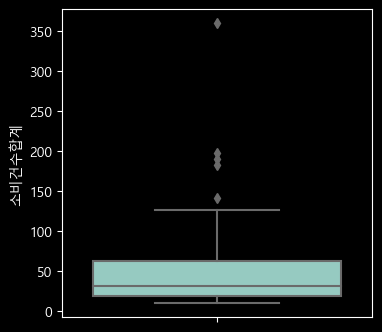

In [205]:
plt.figure(figsize=(4, 4))
sb.boxplot(data=df,y='소비건수합계')
plt.show()
plt.close()

In [206]:
# df.loc[df["소비건수합계"] > 300, "소비건수합계"] = np.nan 
# df
# def replaceMissingValue(df): # MisttingValue = 결측치
#     imr = SimpleImputer(missing_values=np.nan, strategy='max') 
#     df_imr = imr.fit_transform(df.values) # fit으로 인공지능 모델에게 데이터를 학습시키고, transform으로 실제 적용하는 함수
#     re_df = DataFrame(df_imr, index=df.index, columns=df.columns)
#     return re_df 

# final_df = replaceMissingValue(df) 
# final_df

### 수치형 변수의 데이터 요약 통계 

In [207]:
df.describe()

,소비년월,배달식선호등급,건강관심도등급,소비건수합계
count,100.00000,100.000000,100.000000,100.000000
mean,202009.57000,7.430000,13.630000,49.010000
std,0.49757,6.039023,5.434003,50.061073
min,202009.00000,1.000000,1.000000,10.000000
25%,202009.00000,2.000000,10.750000,19.000000
50%,202010.00000,5.500000,15.500000,32.000000
75%,202010.00000,12.000000,18.000000,63.250000
max,202010.00000,20.000000,20.000000,360.000000


### 명목형 변수에 대한 기술 통계

1. 지역별

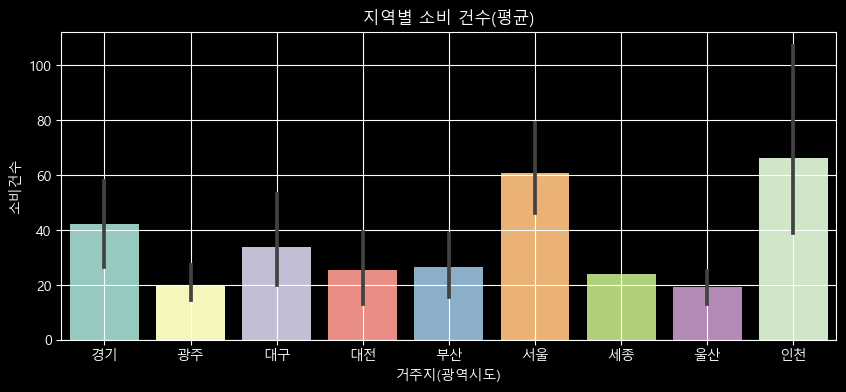

In [208]:
sb.barplot(data=df,x='거주지_광역시도',y='소비건수합계')
plt.title('지역별 소비 건수(평균)')
plt.xlabel('거주지(광역시도)')
plt.ylabel('소비건수')
plt.grid()
plt.show()
plt.close()


In [233]:
거주지별소비건수 = df.query('거주지_광역시도=="서울"')
거주지별소비건수 = 거주지별소비건수.sort_values('거주지_시군구')
거주지별소비건수.head()

,소비년월,거주지_광역시도,거주지_시군구,배달식선호등급,건강관심도등급,연령대,성별,외식업종분류,평일휴일,소비건수합계
43,202009,서울,강남구,2,19,30대,남성,한식,휴일,64
67,202010,서울,강남구,8,14,30대,여성,디저트,평일,110
66,202010,서울,강남구,2,18,30대,여성,한식,휴일,73
41,202009,서울,강동구,2,20,30대,여성,한식,휴일,40
77,202010,서울,강동구,12,11,40대,여성,한식,평일,35


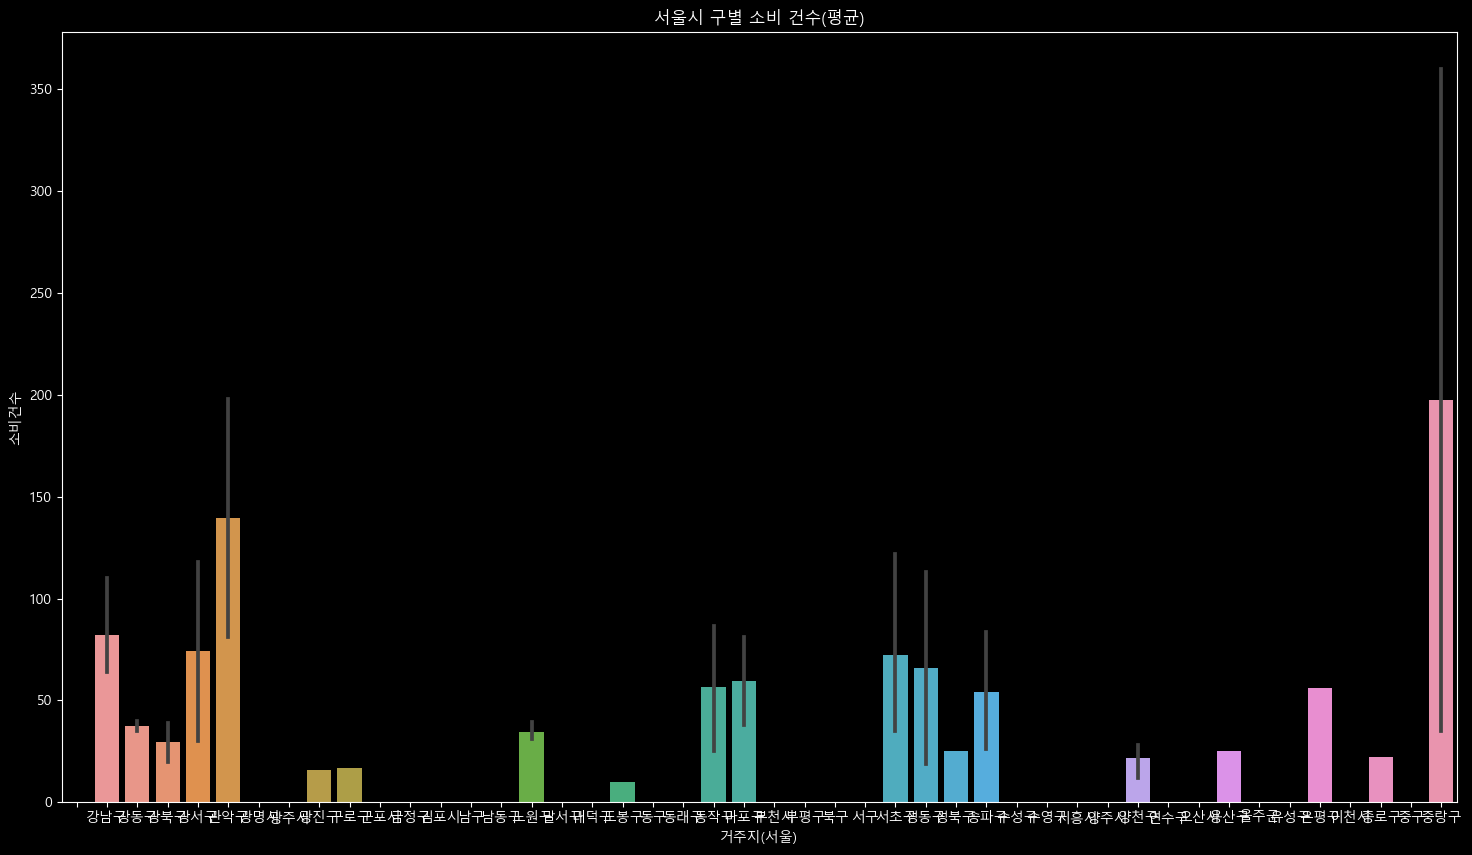

In [234]:
plt.figure(figsize=(18, 10))
plt.title('서울시 구별 소비 건수(평균)')
sb.barplot(data=거주지별소비건수,x='거주지_시군구',y='소비건수합계')
plt.xlabel('거주지(서울)')
plt.ylabel('소비건수')
plt.show()
plt.close()

In [240]:
df3 = pivot_table(df,
            index='거주지_광역시도', 
            columns='소비년월', 
            values='소비건수합계',
            aggfunc='mean' 
)
df3

소비년월,202009,202010
거주지_광역시도,,
경기,64.333333,25.25
광주,21.750000,16.50
대구,41.000000,22.50
대전,20.250000,32.00
부산,34.250000,11.00
서울,57.062500,62.40
세종,NaN,24.00
울산,13.000000,25.00
인천,73.600000,54.00


세종시 결측치 정제

In [237]:
df3 = df3.fillna(value=0)
df3

소비년월,202009,202010
거주지_광역시도,,
경기,64.333333,25.25
광주,21.750000,16.50
대구,41.000000,22.50
대전,20.250000,32.00
부산,34.250000,11.00
서울,57.062500,62.40
세종,0.000000,24.00
울산,13.000000,25.00
인천,73.600000,54.00


In [238]:
x_rables=list(df3.index)
x = np.array(range(0,len(x_rables)))
y1 = list(df3[202009])
y2 = list(df3[202010])

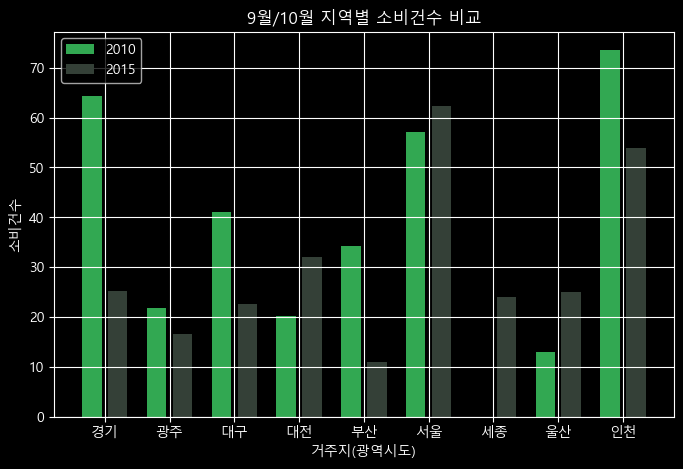

In [239]:
plt.rcParams['figure.figsize'] = (8,5)
plt.figure()
plt.title('9월/10월 지역별 소비건수 비교')
plt.bar(x-0.2,df3[202009],color='#32a852',label='2010',width=0.3)
plt.bar(x+0.2,df3[202010],color='#344037',label='2015',width=0.3)
plt.xlabel('거주지(광역시도)')
plt.ylabel('소비건수')
plt.grid()
plt.legend()
plt.xticks(x,x_rables)
plt.show()
plt.close()

3. 성별/ pie chart (업종별)

In [246]:
df4 = pivot_table(df,
            index='외식업종분류', 
            columns='성별',
            values='소비건수합계',
            aggfunc='mean' 
)
df4

성별,남성,여성
외식업종분류,,
간편음식,46.142857,50.750000
고기,48.500000,23.666667
디저트,38.571429,74.142857
양식/아시안,NaN,49.000000
일식/회,18.000000,NaN
주점,22.333333,NaN
중식,20.666667,NaN
피자/치킨,12.333333,NaN
한식,51.875000,47.923077


In [247]:
df4 = df4.fillna(value=0)
df4

성별,남성,여성
외식업종분류,,
간편음식,46.142857,50.750000
고기,48.500000,23.666667
디저트,38.571429,74.142857
양식/아시안,0.000000,49.000000
일식/회,18.000000,0.000000
주점,22.333333,0.000000
중식,20.666667,0.000000
피자/치킨,12.333333,0.000000
한식,51.875000,47.923077


In [275]:
df4['합계'] = df4[df4.columns[:]].sum(axis=1)
df4

성별,남성,여성,합계
외식업종분류,,,
간편음식,46.142857,50.750000,96.892857
고기,48.500000,23.666667,72.166667
디저트,38.571429,74.142857,112.714286
양식/아시안,0.000000,49.000000,49.000000
일식/회,18.000000,0.000000,18.000000
주점,22.333333,0.000000,22.333333
중식,20.666667,0.000000,20.666667
피자/치킨,12.333333,0.000000,12.333333
한식,51.875000,47.923077,99.798077


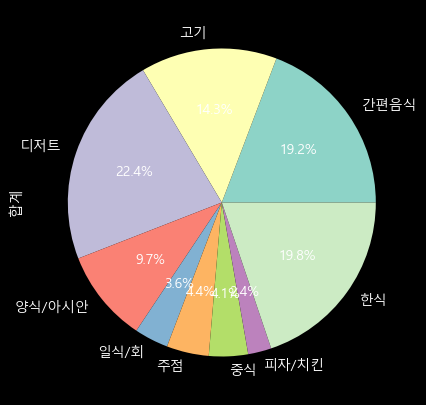

In [276]:
df4['합계'].plot.pie(autopct='%0.1f%%')
plt.show()
plt.close()

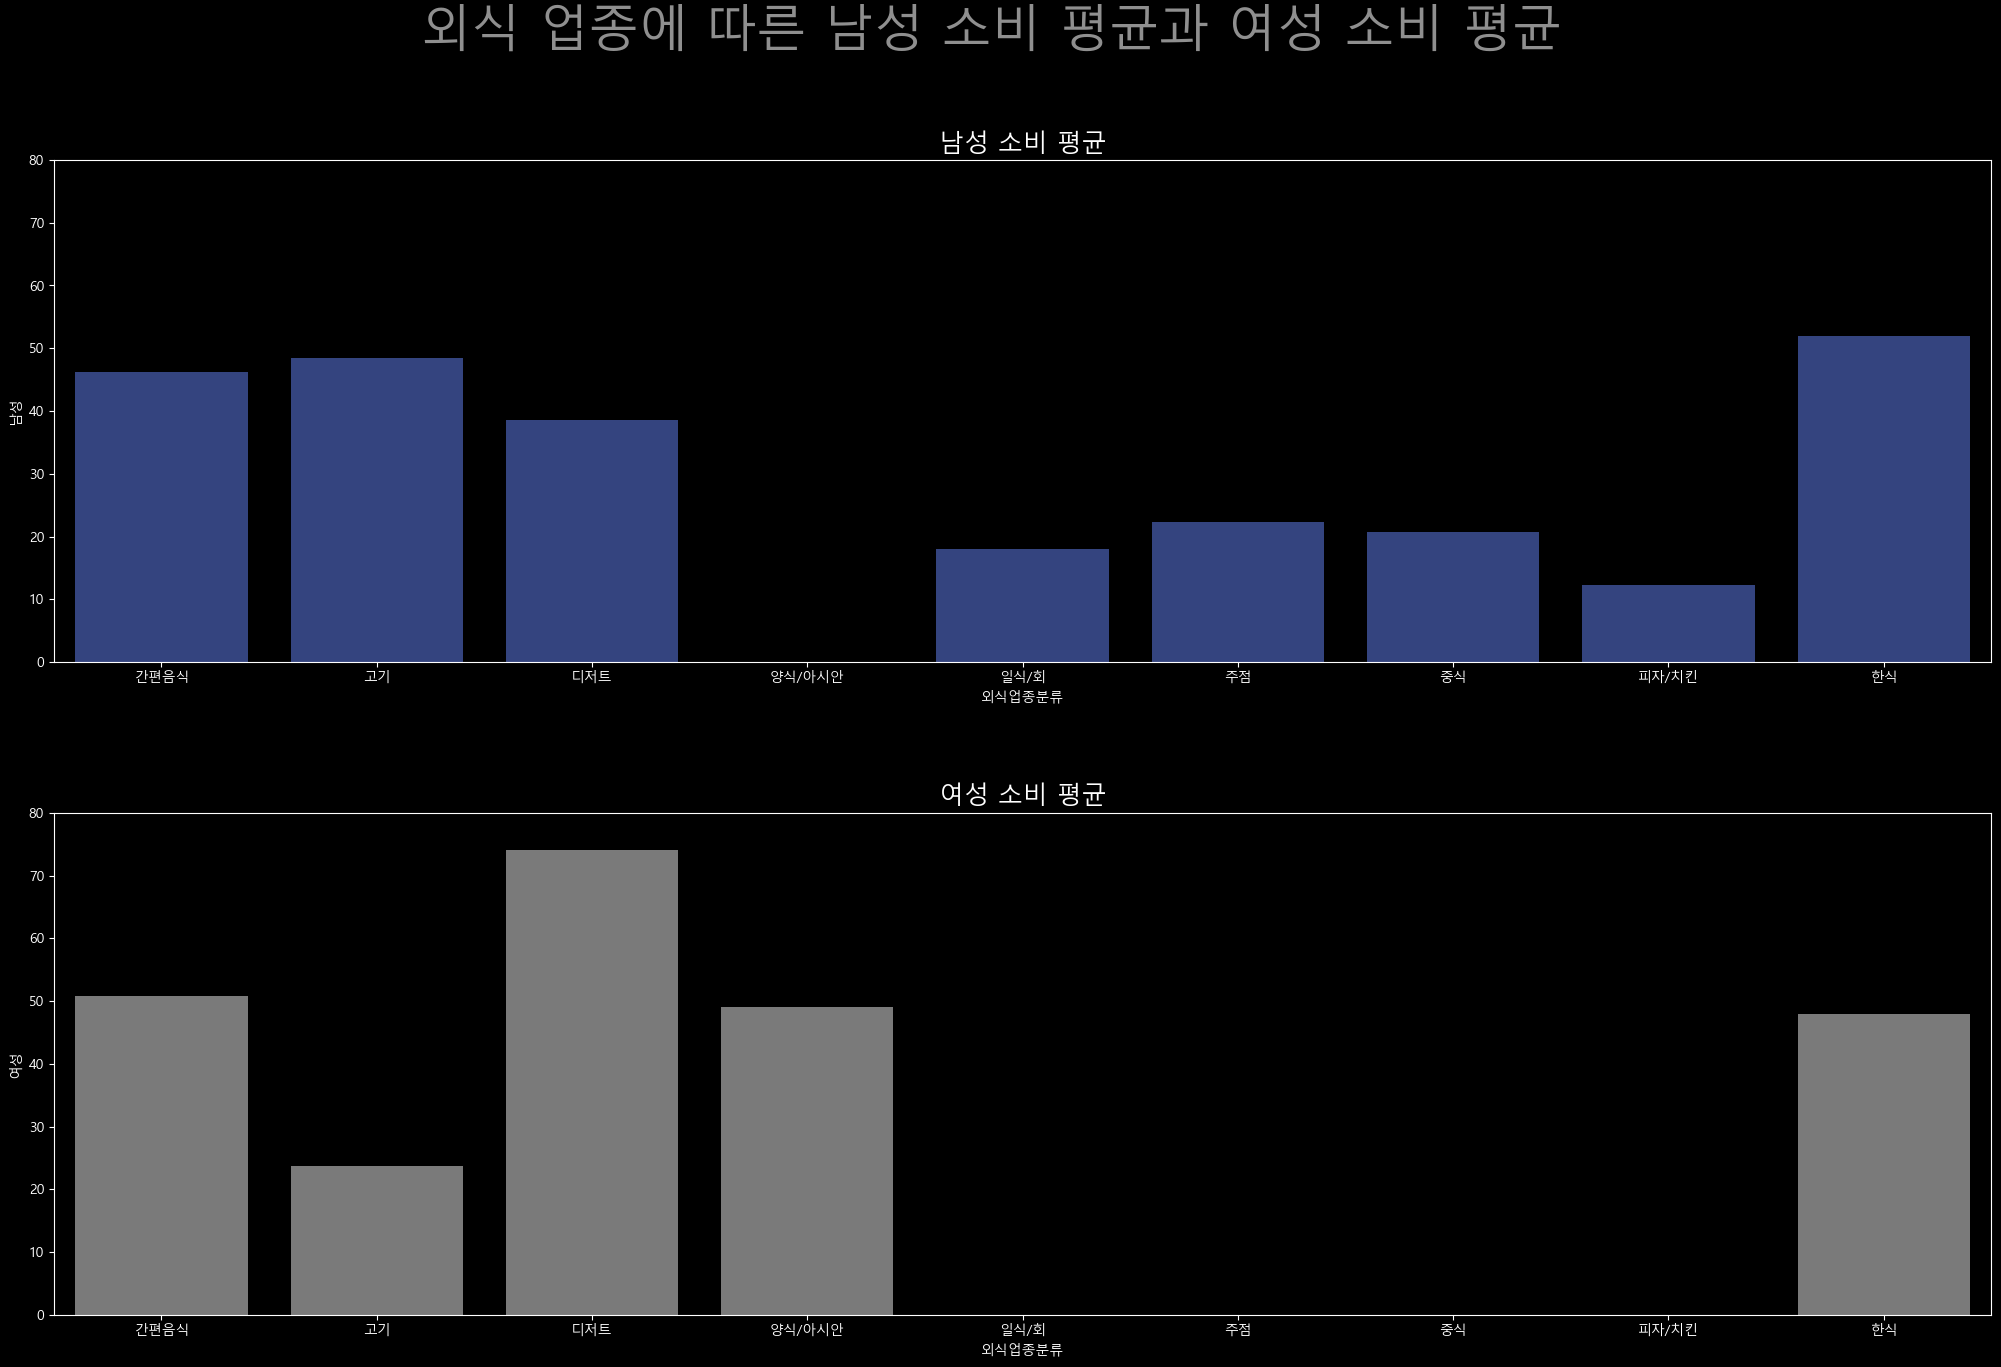

In [278]:
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(25, 15))
fig.suptitle('외식 업종에 따른 남성 소비 평균과 여성 소비 평균', fontsize=36, color='#8f8f8f')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

sb.barplot(data=df4, x=df4.index, y='남성', color="#273d8c", ax=ax1_left)
ax1_left.set_title('남성 소비 평균', fontsize=18)
ax1_left.set_ylim(0, 80) 

sb.barplot(data=df4, x=df4.index, y='여성', color="#7a7a7a", ax=ax2_left)
ax2_left.set_title('여성 소비 평균', fontsize=18)
ax2_left.set_ylim(0, 80) 

plt.show()
plt.close()

산점도(추세선) - 연령 
scatterplot '배달음식 연령별 소비건수' ## 집단별 산점도 그래프

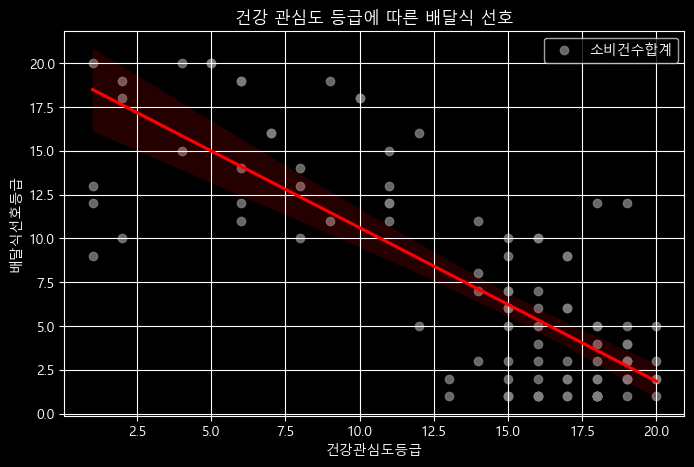

In [279]:
sb.regplot(data=df,x='건강관심도등급',y='배달식선호등급',label='소비건수합계',line_kws={'color':'red'},scatter_kws={'color':'grey'})
plt.title('건강 관심도 등급에 따른 배달식 선호')
plt.xlabel('건강관심도등급')
plt.ylabel('배달식선호등급')
plt.legend()
plt.grid()
plt.show()
plt.close()

모자이크 - 평일/휴일 
+ 성별 소비건수 (두 개 이상 범주에 대한 비율 표시) 

In [211]:
# ------------------------------------------------------------

y축 2개 - 업종 
2개 y축 그래프 한 번에 - 서울/전국 누적확진자와 일일 확진자 변동추이 ?

In [212]:
# catplot - 건강관심도 
# 등급에 따른 배달음식 소비 건수를 여부를 두 개의 그래프로 분리

SyntaxError: invalid syntax (1123115452.py, line 2)

도수분포표 - 등급을 1~5로 배분배 

(seaborn) 히스토그램 - 히스토그램 - 성별에 따른 배달 소비건수 수준을 비교하고자 한다. 성별에 따라 서브플롯을 구성하여 배달 소비건수 수준을 히스토그램으로 시각화 하고 설명하시오

In [ ]:
bar플롯 2개 한번에 배달식선호등급/건강관심도 등급

서울 지도 시각화

전국 지도 시각화